In [ ]:
import numpy as np
import pandas as pd


In [ ]:
credit = pd.read_csv('/content/credit_record.csv')
app = pd.read_csv('/content/application_record.csv')

In [ ]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [ ]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0


In [ ]:
credit['bad_credit'] = credit['STATUS'].isin(['1','2','3','4','5']).astype(int)
credit_target = credit.groupby('ID')['bad_credit'].max().reset_index()

credit_target['Approved'] = 1 - credit_target['bad_credit']
credit_target.drop('bad_credit', axis=1, inplace=True)

In [ ]:
df = app.merge(credit_target, on='ID', how='inner')
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approved
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005.0,-4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474.0,-1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110.0,-3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0,1
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0,1
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464.0,365243.0,1.0,0.0,0.0,0.0,NaN,1.0,1


**Our Target Column is Ready**

In [ ]:
df['Approved'].value_counts(normalize=True)

,proportion
Approved,
1,0.890902
0,0.109098


**Data is Imabalanced**

In [ ]:
df = df.drop(columns=['ID'], axis=1)
df['DAYS_BIRTH'] = abs(df['DAYS_BIRTH'])
df['DAYS_EMPLOYED'] = abs(df['DAYS_EMPLOYED'])

In [ ]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Approved
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005.0,4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,12005.0,4542.0,1.0,1.0,0.0,0.0,NaN,2.0,0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,21474.0,1134.0,1.0,0.0,0.0,0.0,Security staff,2.0,1
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110.0,3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,19110.0,3051.0,1.0,0.0,1.0,1.0,Sales staff,1.0,1


### **Features EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36105 entries, 0 to 36104
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODE_GENDER          36105 non-null  object 
 1   FLAG_OWN_CAR         36105 non-null  object 
 2   FLAG_OWN_REALTY      36105 non-null  object 
 3   CNT_CHILDREN         36105 non-null  int64  
 4   AMT_INCOME_TOTAL     36105 non-null  float64
 5   NAME_INCOME_TYPE     36105 non-null  object 
 6   NAME_EDUCATION_TYPE  36105 non-null  object 
 7   NAME_FAMILY_STATUS   36105 non-null  object 
 8   NAME_HOUSING_TYPE    36105 non-null  object 
 9   DAYS_BIRTH           36105 non-null  float64
 10  DAYS_EMPLOYED        36105 non-null  float64
 11  FLAG_MOBIL           36105 non-null  float64
 12  FLAG_WORK_PHONE      36105 non-null  float64
 13  FLAG_PHONE           36105 non-null  float64
 14  FLAG_EMAIL           36105 non-null  float64
 15  OCCUPATION_TYPE      24891 non-null 

In [ ]:
df.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
DAYS_BIRTH,0


In [ ]:
# Handling null values
df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2198591648.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)


In [ ]:
df.isnull().sum()

,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0
DAYS_BIRTH,0


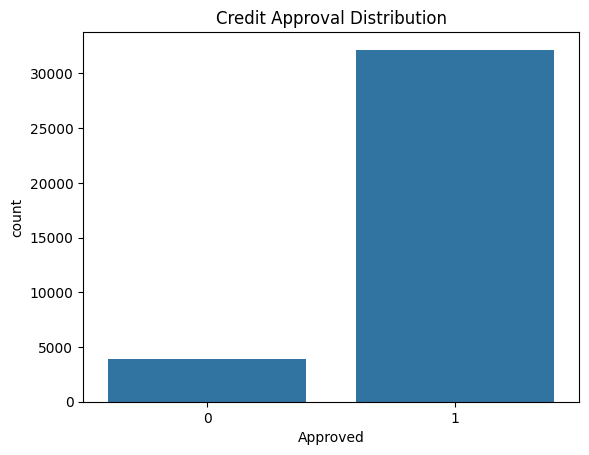

In [ ]:
sns.countplot(data=df, x='Approved')
plt.title('Credit Approval Distribution')
plt.show()


In [ ]:
x = df.drop('Approved', axis=1)
y = df['Approved']

In [ ]:
num_cols = x.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS'],
      dtype='object')

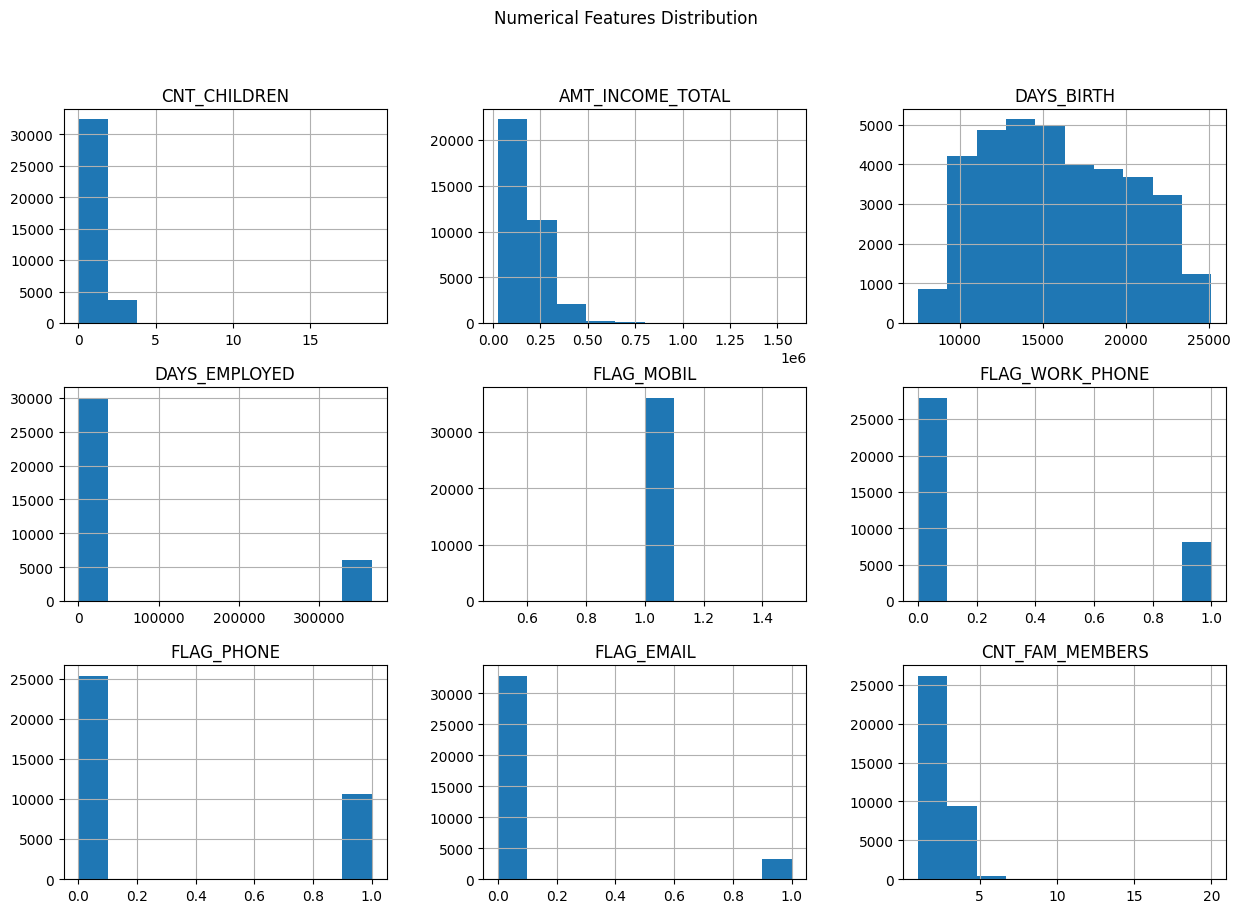

In [ ]:
df[num_cols].hist(figsize=(15,10))
plt.suptitle('Numerical Features Distribution')
plt.show()

#### **Outlier Analysis**

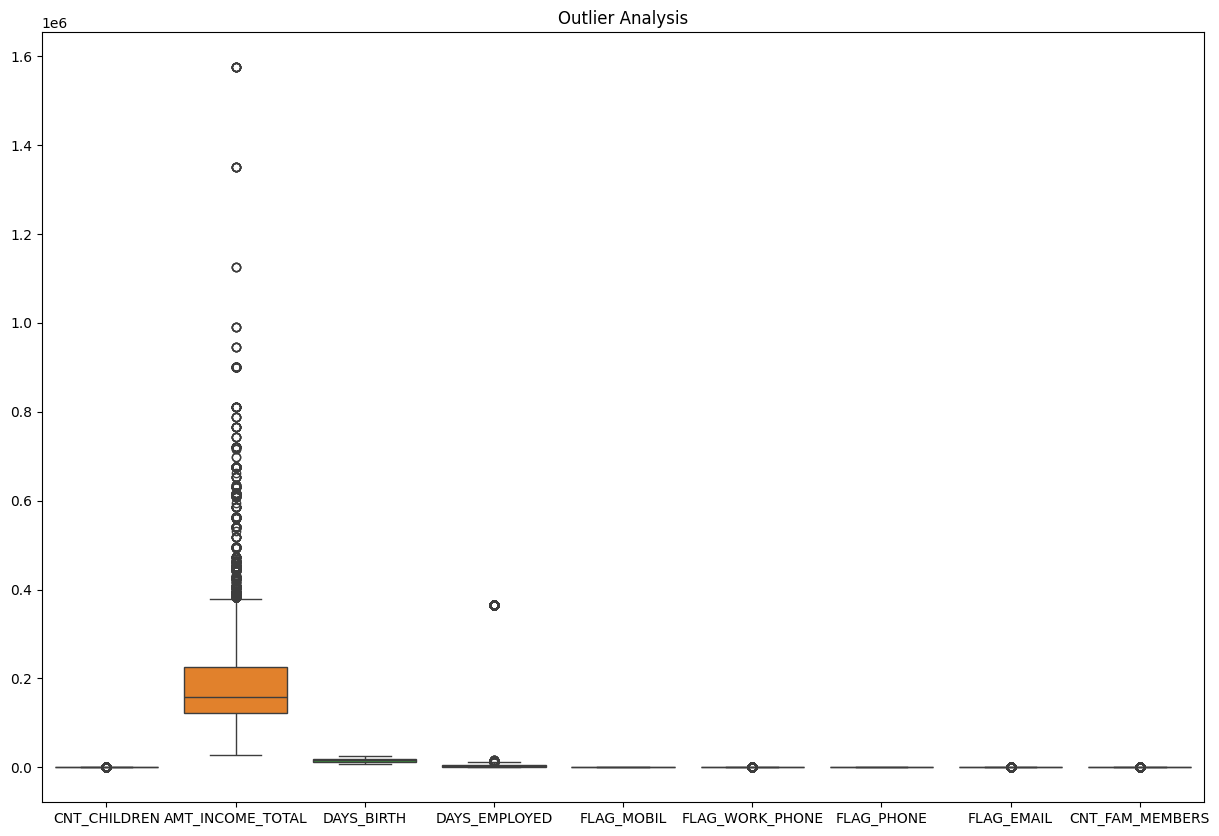

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[num_cols])
plt.title('Outlier Analysis')
plt.show()

**Insights : Income and no of days employed have lot of outliers**

In [ ]:
cat_cols = x.select_dtypes(include=['object']).columns
cat_cols

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE'],
      dtype='object')

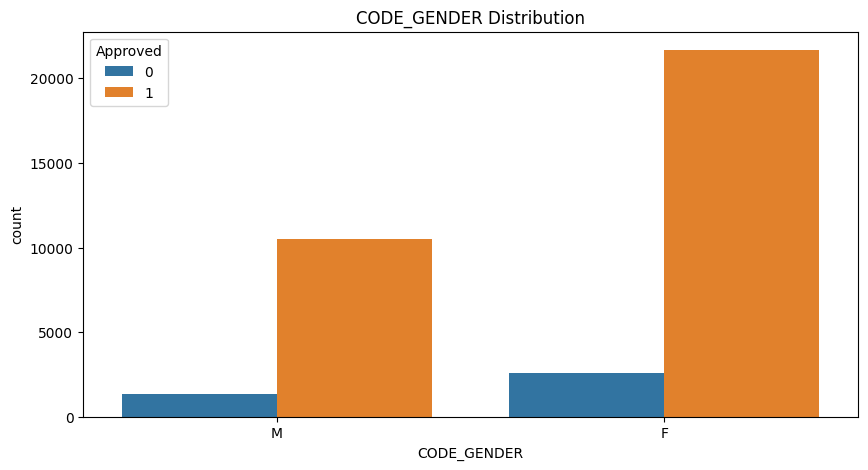

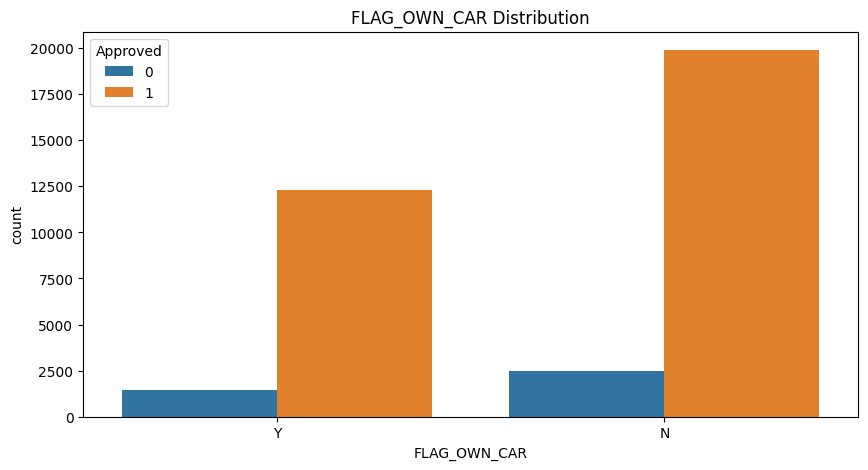

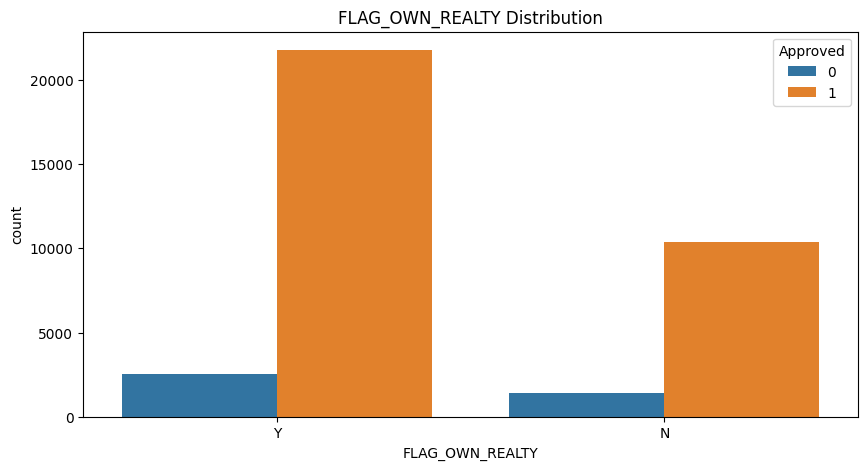

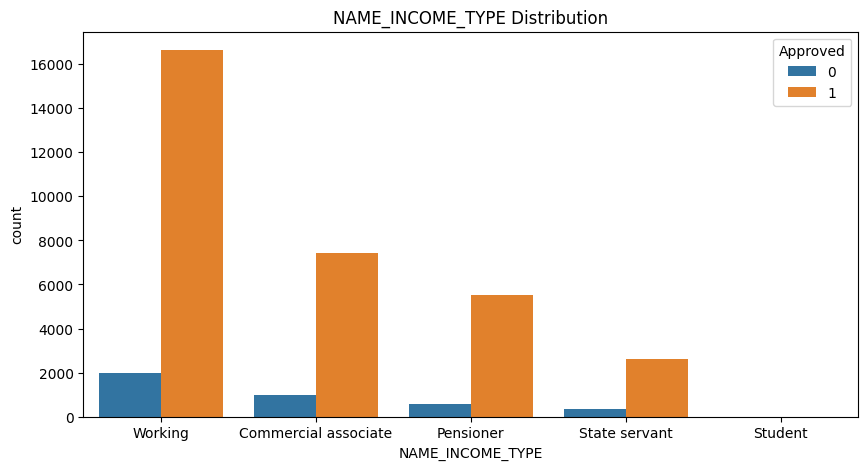

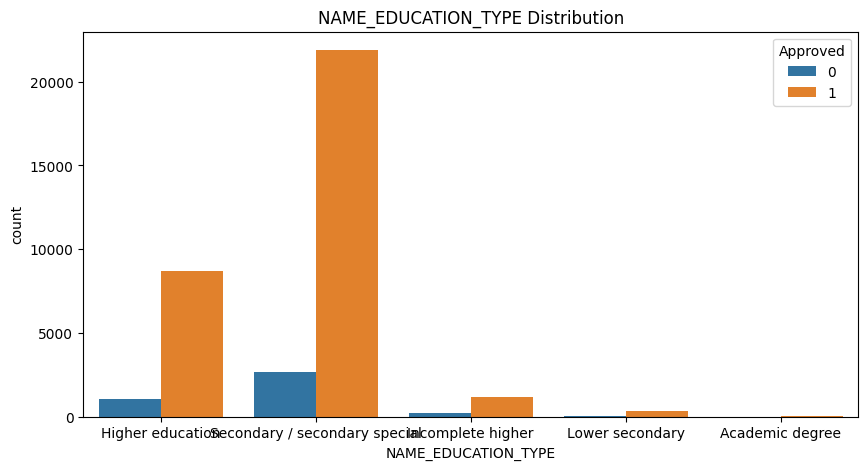

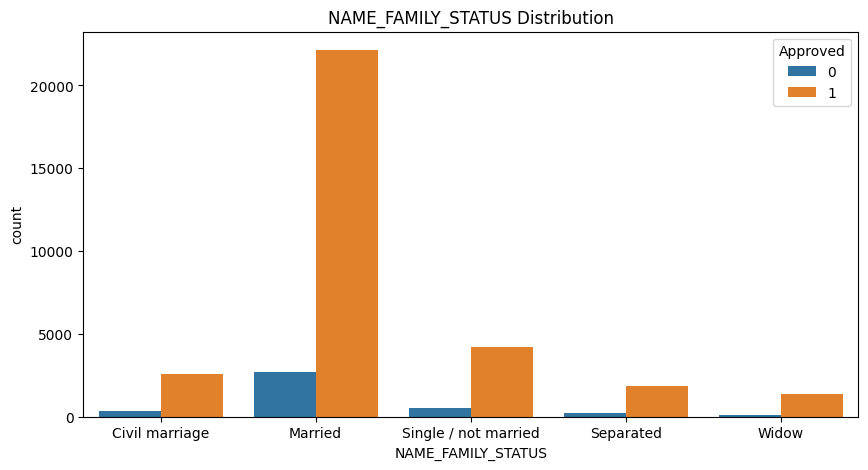

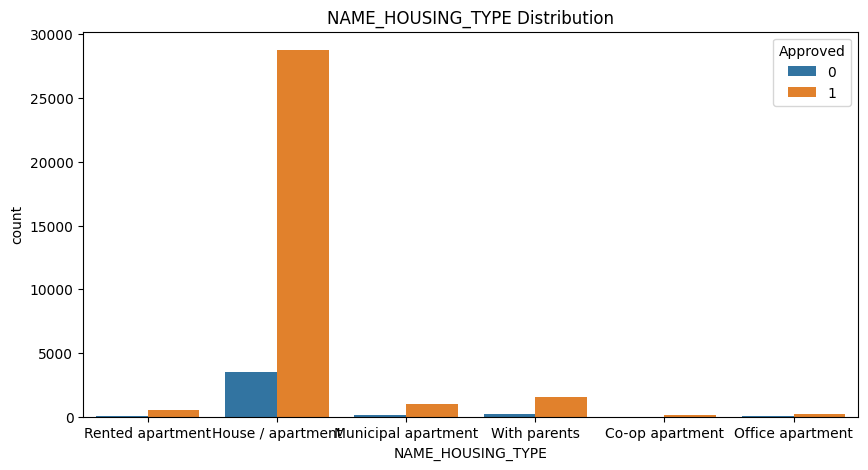

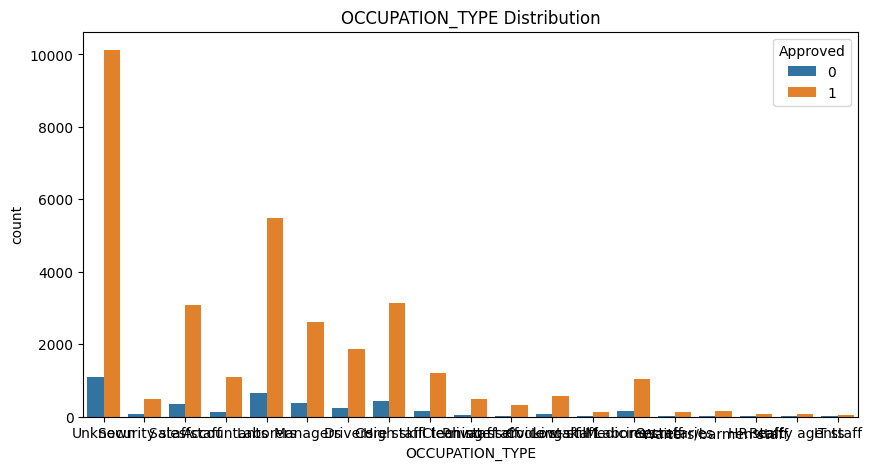

In [ ]:
for col in cat_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(data=df, x=col, hue='Approved')
  plt.title(f'{col} Distribution')
  plt.show()

**Insights**
1. Females are approved more credit cards than males
2. Property owners are approved more credit cards
3. Education level impacts approval
4. Housing type as Apartments are majorily approved
5. Income type and family status is strongly correlated

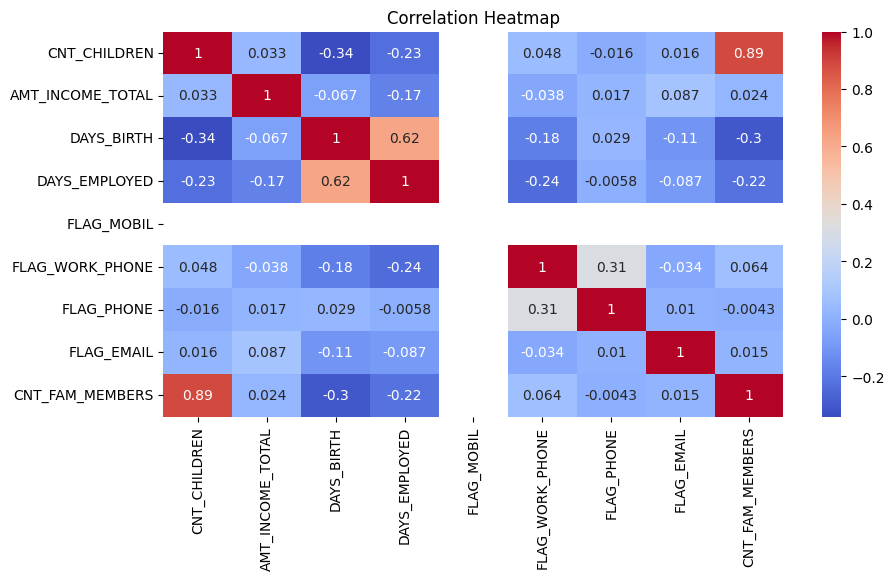

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Preprocessing**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [ ]:
x_train_prep = preprocessor.fit_transform(x_train)
x_test_prep = preprocessor.transform(x_test)

**Handling Oversampling of Data**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_prep, y_train)
y_train_resampled.value_counts()

,count
Approved,
1,25733
0,25733


### **Model Building**

In [ ]:
!pip install catboost
!pip install imbalanced-learn
!pip install optuna
!pip install xgboost
!pip install lightgbm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import optuna
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 27.4 MB/s eta 0:00:00


In [ ]:
def evaluate_model(model):
  fit_params = {}

  if hasattr(model, 'early_stopping_rounds') and model.early_stopping_rounds is not None:
    fit_params['eval_set'] = [(x_test_prep, y_test)]


  model.fit(x_train_resampled, y_train_resampled, **fit_params)
  y_pred = model.predict_proba(x_test_prep)[:,1]
  return roc_auc_score(y_test, y_pred)

In [ ]:
def optuna_lr(trial):
  model = LogisticRegression(
      C=trial.suggest_float('C', 0.001, 10),
      penalty=trial.suggest_categorical('penalty', ['l1', 'l2']),
      solver=trial.suggest_categorical('solver', ['liblinear', 'saga']),
      random_state=42
  )
  return evaluate_model(model)

In [ ]:
def optuna_dt(trial):
  model = DecisionTreeClassifier(
      criterion=trial.suggest_categorical('criterion', ['gini', 'entropy']),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
      min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
      random_state=42
  )
  return evaluate_model(model)

In [ ]:
def optuna_rf(trial):
  model = RandomForestClassifier(
      n_estimators=trial.suggest_int('n_estimators', 100, 500),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      min_samples_split=trial.suggest_int('min_samples_split', 2, 10),
      min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
      n_jobs=-1,
      random_state=42
  )
  return evaluate_model(model)

In [ ]:
def optuna_gb(trial):
  model = GradientBoostingClassifier(
      n_estimators=trial.suggest_int('n_estimators', 100, 500),
      learning_rate=trial.suggest_float('learning_rate', 0.001, 0.5),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10),
      random_state=42
  )
  return evaluate_model(model)

In [ ]:
def optuna_xgb(trial):
  model = XGBClassifier(
      n_estimators=trial.suggest_int('n_estimators', 200, 800),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      early_stopping_rounds=20,
      learning_rate=trial.suggest_float('learning_rate', 0.001, 0.5),
      subsample=trial.suggest_float('subsample', 0.5, 1),
      colsample_bytree=trial.suggest_float('colsample_bytree', 0.5, 1),
      gamma=trial.suggest_float('gamma', 0.001, 1),
      eval_metric='auc',
      n_jobs=-1,
      random_state=42
  )
  return evaluate_model(model)

In [ ]:
def optuna_lgbm(trial):
  model = LGBMClassifier(
      n_estimators=trial.suggest_int('n_estimators', 200, 800),
      max_depth=trial.suggest_int('max_depth', 2, 10),
      learning_rate=trial.suggest_float('learning_rate', 0.001, 0.5),
      subsample=trial.suggest_float('subsample', 0.5, 1),
      colsample_bytree=trial.suggest_float('colsample_bytree', 0.5, 1),
      early_stopping_rounds=20,
      eval_metric='auc',
      n_jobs=-1,
      random_state=42
  )
  return evaluate_model(model)

In [ ]:
def optuna_cat(trial):
  model = CatBoostClassifier(
      iterations=trial.suggest_int('iterations', 200, 800),
      learning_rate=trial.suggest_float('learning_rate', 0.001, 0.5),
      depth=trial.suggest_int('depth', 2, 10),
      random_state=42
  )
  return evaluate_model(model)

In [ ]:
studies = {
    "LogisticRegression": optuna_lr,
    "DecisionTree": optuna_dt,
    "RandomForest": optuna_rf,
    "GradientBoosting": optuna_gb,
    "XGBoost": optuna_xgb,
    "LightGBM": optuna_lgbm,
    "CatBoost": optuna_cat
}

results = []

for name, func in studies.items():
    study = optuna.create_study(direction="maximize")
    study.optimize(func, n_trials=10)

    results.append({
        "Model": name,
        "Best ROC-AUC": study.best_value,
        "Best Params": study.best_params
    })

[I 2026-01-28 08:01:56,192] A new study created in memory with name: no-name-2d8f804c-104b-4713-9791-28c9c007719d
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2026-01-28 08:02:01,814] Trial 0 finished with value: 0.533796726271028 and parameters: {'C': 2.4293896508756387, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.533796726271028.
[I 2026-01-28 08:02:12,782] Trial 1 finished with value: 0.533838350163063 and parameters: {'C': 3.6698624840390934, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 1 with value: 0.533838350163063.
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[I 2026-01-28 08:02:19,739] Trial 2 finished with value: 0.5337819310487406 and parameters: {'C': 5.563571118503573, 'penalty': 'l1

[0]	validation_0-auc:0.55887
[1]	validation_0-auc:0.57877
[2]	validation_0-auc:0.59521
[3]	validation_0-auc:0.60099
[4]	validation_0-auc:0.61107
[5]	validation_0-auc:0.61451
[6]	validation_0-auc:0.61582
[7]	validation_0-auc:0.61143
[8]	validation_0-auc:0.61419
[9]	validation_0-auc:0.62037
[10]	validation_0-auc:0.62398
[11]	validation_0-auc:0.62441
[12]	validation_0-auc:0.62411
[13]	validation_0-auc:0.62630
[14]	validation_0-auc:0.62998
[15]	validation_0-auc:0.63266
[16]	validation_0-auc:0.64099
[17]	validation_0-auc:0.64242
[18]	validation_0-auc:0.64369
[19]	validation_0-auc:0.64937
[20]	validation_0-auc:0.65055
[21]	validation_0-auc:0.65262
[22]	validation_0-auc:0.65249
[23]	validation_0-auc:0.65441
[24]	validation_0-auc:0.65634
[25]	validation_0-auc:0.65616
[26]	validation_0-auc:0.65863
[27]	validation_0-auc:0.65962
[28]	validation_0-auc:0.66098
[29]	validation_0-auc:0.66446
[30]	validation_0-auc:0.66693
[31]	validation_0-auc:0.66770
[32]	validation_0-auc:0.66901
[33]	validation_0-au

[I 2026-01-28 08:15:29,728] Trial 0 finished with value: 0.7416659499203425 and parameters: {'n_estimators': 604, 'max_depth': 10, 'learning_rate': 0.18784189532898743, 'subsample': 0.5360245004126233, 'colsample_bytree': 0.7002888865036864, 'gamma': 0.989066538643447}. Best is trial 0 with value: 0.7416659499203425.


[0]	validation_0-auc:0.52596
[1]	validation_0-auc:0.53704
[2]	validation_0-auc:0.55580
[3]	validation_0-auc:0.55868
[4]	validation_0-auc:0.56663
[5]	validation_0-auc:0.56813
[6]	validation_0-auc:0.57419
[7]	validation_0-auc:0.57309
[8]	validation_0-auc:0.57576
[9]	validation_0-auc:0.58160
[10]	validation_0-auc:0.58617
[11]	validation_0-auc:0.58827
[12]	validation_0-auc:0.58737
[13]	validation_0-auc:0.58771
[14]	validation_0-auc:0.58747
[15]	validation_0-auc:0.58937
[16]	validation_0-auc:0.59432
[17]	validation_0-auc:0.59601
[18]	validation_0-auc:0.59807
[19]	validation_0-auc:0.59948
[20]	validation_0-auc:0.59832
[21]	validation_0-auc:0.59953
[22]	validation_0-auc:0.60111
[23]	validation_0-auc:0.60216
[24]	validation_0-auc:0.60500
[25]	validation_0-auc:0.60526
[26]	validation_0-auc:0.60685
[27]	validation_0-auc:0.60602
[28]	validation_0-auc:0.60655
[29]	validation_0-auc:0.60803
[30]	validation_0-auc:0.60965
[31]	validation_0-auc:0.61057
[32]	validation_0-auc:0.61240
[33]	validation_0-au

[I 2026-01-28 08:15:37,546] Trial 1 finished with value: 0.7228338019144622 and parameters: {'n_estimators': 565, 'max_depth': 7, 'learning_rate': 0.17438269379197333, 'subsample': 0.6391753325591067, 'colsample_bytree': 0.9931099935127161, 'gamma': 0.9519325467241516}. Best is trial 0 with value: 0.7416659499203425.


[0]	validation_0-auc:0.56013
[1]	validation_0-auc:0.58420
[2]	validation_0-auc:0.60086
[3]	validation_0-auc:0.60737
[4]	validation_0-auc:0.61676
[5]	validation_0-auc:0.62116
[6]	validation_0-auc:0.62692
[7]	validation_0-auc:0.62922
[8]	validation_0-auc:0.63514
[9]	validation_0-auc:0.64342
[10]	validation_0-auc:0.64531
[11]	validation_0-auc:0.65020
[12]	validation_0-auc:0.65036
[13]	validation_0-auc:0.65426
[14]	validation_0-auc:0.65440
[15]	validation_0-auc:0.65931
[16]	validation_0-auc:0.66189
[17]	validation_0-auc:0.66544
[18]	validation_0-auc:0.66537
[19]	validation_0-auc:0.67151
[20]	validation_0-auc:0.67287
[21]	validation_0-auc:0.67732
[22]	validation_0-auc:0.67825
[23]	validation_0-auc:0.68053
[24]	validation_0-auc:0.68380
[25]	validation_0-auc:0.68455
[26]	validation_0-auc:0.68803
[27]	validation_0-auc:0.68963
[28]	validation_0-auc:0.69019
[29]	validation_0-auc:0.69359
[30]	validation_0-auc:0.69530
[31]	validation_0-auc:0.69704
[32]	validation_0-auc:0.69739
[33]	validation_0-au

[I 2026-01-28 08:15:46,007] Trial 2 finished with value: 0.7437655892325501 and parameters: {'n_estimators': 775, 'max_depth': 10, 'learning_rate': 0.4019068982685867, 'subsample': 0.5546952781842087, 'colsample_bytree': 0.8361274096127205, 'gamma': 0.8071175107866169}. Best is trial 2 with value: 0.7437655892325501.


[0]	validation_0-auc:0.56948
[1]	validation_0-auc:0.59424
[2]	validation_0-auc:0.59708
[3]	validation_0-auc:0.61598
[4]	validation_0-auc:0.61663
[5]	validation_0-auc:0.62516
[6]	validation_0-auc:0.62629
[7]	validation_0-auc:0.62689
[8]	validation_0-auc:0.63044
[9]	validation_0-auc:0.63168
[10]	validation_0-auc:0.62947
[11]	validation_0-auc:0.63273
[12]	validation_0-auc:0.63649
[13]	validation_0-auc:0.63818
[14]	validation_0-auc:0.64150
[15]	validation_0-auc:0.64299
[16]	validation_0-auc:0.64524
[17]	validation_0-auc:0.64617
[18]	validation_0-auc:0.65313
[19]	validation_0-auc:0.65487
[20]	validation_0-auc:0.65578
[21]	validation_0-auc:0.65626
[22]	validation_0-auc:0.65848
[23]	validation_0-auc:0.66140
[24]	validation_0-auc:0.66450
[25]	validation_0-auc:0.66783
[26]	validation_0-auc:0.67161
[27]	validation_0-auc:0.67226
[28]	validation_0-auc:0.67264
[29]	validation_0-auc:0.67445
[30]	validation_0-auc:0.67614
[31]	validation_0-auc:0.67931
[32]	validation_0-auc:0.67926
[33]	validation_0-au

[I 2026-01-28 08:15:54,444] Trial 3 finished with value: 0.7365857637609375 and parameters: {'n_estimators': 704, 'max_depth': 9, 'learning_rate': 0.3239876921657308, 'subsample': 0.6502694121056759, 'colsample_bytree': 0.7853978154988377, 'gamma': 0.6679730190411108}. Best is trial 2 with value: 0.7437655892325501.


[0]	validation_0-auc:0.50879
[1]	validation_0-auc:0.50915
[2]	validation_0-auc:0.52633
[3]	validation_0-auc:0.52565
[4]	validation_0-auc:0.53136
[5]	validation_0-auc:0.53267
[6]	validation_0-auc:0.54241
[7]	validation_0-auc:0.54149
[8]	validation_0-auc:0.54834
[9]	validation_0-auc:0.54957
[10]	validation_0-auc:0.55294
[11]	validation_0-auc:0.55196
[12]	validation_0-auc:0.55326
[13]	validation_0-auc:0.55800
[14]	validation_0-auc:0.55921
[15]	validation_0-auc:0.55643
[16]	validation_0-auc:0.55631
[17]	validation_0-auc:0.55396
[18]	validation_0-auc:0.55760
[19]	validation_0-auc:0.55848
[20]	validation_0-auc:0.56185
[21]	validation_0-auc:0.56274
[22]	validation_0-auc:0.56490
[23]	validation_0-auc:0.56449
[24]	validation_0-auc:0.56334
[25]	validation_0-auc:0.56271
[26]	validation_0-auc:0.55945
[27]	validation_0-auc:0.55973
[28]	validation_0-auc:0.56053
[29]	validation_0-auc:0.56321
[30]	validation_0-auc:0.56246
[31]	validation_0-auc:0.56660
[32]	validation_0-auc:0.56832
[33]	validation_0-au

[I 2026-01-28 08:15:58,986] Trial 4 finished with value: 0.6551386568778846 and parameters: {'n_estimators': 311, 'max_depth': 4, 'learning_rate': 0.32228197811949255, 'subsample': 0.5274339633550965, 'colsample_bytree': 0.8385654660140289, 'gamma': 0.6360671599782463}. Best is trial 2 with value: 0.7437655892325501.


[0]	validation_0-auc:0.56190
[1]	validation_0-auc:0.58150
[2]	validation_0-auc:0.59316
[3]	validation_0-auc:0.59509
[4]	validation_0-auc:0.60418
[5]	validation_0-auc:0.60591
[6]	validation_0-auc:0.60487
[7]	validation_0-auc:0.60086
[8]	validation_0-auc:0.60157
[9]	validation_0-auc:0.60540
[10]	validation_0-auc:0.60597
[11]	validation_0-auc:0.60535
[12]	validation_0-auc:0.60524
[13]	validation_0-auc:0.60876
[14]	validation_0-auc:0.60947
[15]	validation_0-auc:0.60826
[16]	validation_0-auc:0.61196
[17]	validation_0-auc:0.61394
[18]	validation_0-auc:0.61313
[19]	validation_0-auc:0.61036
[20]	validation_0-auc:0.61100
[21]	validation_0-auc:0.61240
[22]	validation_0-auc:0.61373
[23]	validation_0-auc:0.61677
[24]	validation_0-auc:0.61867
[25]	validation_0-auc:0.61892
[26]	validation_0-auc:0.62035
[27]	validation_0-auc:0.62186
[28]	validation_0-auc:0.62280
[29]	validation_0-auc:0.62333
[30]	validation_0-auc:0.62496
[31]	validation_0-auc:0.62623
[32]	validation_0-auc:0.62672
[33]	validation_0-au

[I 2026-01-28 08:16:16,663] Trial 5 finished with value: 0.6963929642602665 and parameters: {'n_estimators': 372, 'max_depth': 10, 'learning_rate': 0.022928597187354748, 'subsample': 0.6970611417089178, 'colsample_bytree': 0.9444991866962995, 'gamma': 0.1900241963424771}. Best is trial 2 with value: 0.7437655892325501.


[0]	validation_0-auc:0.54900
[1]	validation_0-auc:0.57984
[2]	validation_0-auc:0.58493
[3]	validation_0-auc:0.60077
[4]	validation_0-auc:0.60749
[5]	validation_0-auc:0.60655
[6]	validation_0-auc:0.61063
[7]	validation_0-auc:0.61263
[8]	validation_0-auc:0.62095
[9]	validation_0-auc:0.62633
[10]	validation_0-auc:0.62552
[11]	validation_0-auc:0.63261
[12]	validation_0-auc:0.63504
[13]	validation_0-auc:0.63750
[14]	validation_0-auc:0.64035
[15]	validation_0-auc:0.63980
[16]	validation_0-auc:0.64043
[17]	validation_0-auc:0.64418
[18]	validation_0-auc:0.64676
[19]	validation_0-auc:0.65113
[20]	validation_0-auc:0.65101
[21]	validation_0-auc:0.65586
[22]	validation_0-auc:0.65602
[23]	validation_0-auc:0.65680
[24]	validation_0-auc:0.65846
[25]	validation_0-auc:0.65981
[26]	validation_0-auc:0.66063
[27]	validation_0-auc:0.66081
[28]	validation_0-auc:0.66238
[29]	validation_0-auc:0.66681
[30]	validation_0-auc:0.66854
[31]	validation_0-auc:0.66946
[32]	validation_0-auc:0.67042
[33]	validation_0-au

[I 2026-01-28 08:16:23,852] Trial 6 finished with value: 0.7436801714825444 and parameters: {'n_estimators': 305, 'max_depth': 9, 'learning_rate': 0.28136916064867984, 'subsample': 0.7730513127960552, 'colsample_bytree': 0.6470505690642921, 'gamma': 0.6894014459226971}. Best is trial 2 with value: 0.7437655892325501.


[0]	validation_0-auc:0.56608
[1]	validation_0-auc:0.57108
[2]	validation_0-auc:0.58943
[3]	validation_0-auc:0.60079
[4]	validation_0-auc:0.60401
[5]	validation_0-auc:0.60479
[6]	validation_0-auc:0.60951
[7]	validation_0-auc:0.60975
[8]	validation_0-auc:0.60679
[9]	validation_0-auc:0.61168
[10]	validation_0-auc:0.61071
[11]	validation_0-auc:0.61175
[12]	validation_0-auc:0.61214
[13]	validation_0-auc:0.61386
[14]	validation_0-auc:0.61506
[15]	validation_0-auc:0.61789
[16]	validation_0-auc:0.61920
[17]	validation_0-auc:0.61976
[18]	validation_0-auc:0.62145
[19]	validation_0-auc:0.62565
[20]	validation_0-auc:0.62732
[21]	validation_0-auc:0.63108
[22]	validation_0-auc:0.63101
[23]	validation_0-auc:0.63377
[24]	validation_0-auc:0.63467
[25]	validation_0-auc:0.63550
[26]	validation_0-auc:0.63837
[27]	validation_0-auc:0.63833
[28]	validation_0-auc:0.63877
[29]	validation_0-auc:0.64013
[30]	validation_0-auc:0.64271
[31]	validation_0-auc:0.64330
[32]	validation_0-auc:0.64346
[33]	validation_0-au

[I 2026-01-28 08:16:34,769] Trial 7 finished with value: 0.7273779078529884 and parameters: {'n_estimators': 271, 'max_depth': 9, 'learning_rate': 0.12806465642632903, 'subsample': 0.5562687403333634, 'colsample_bytree': 0.8460580613553407, 'gamma': 0.26665713905970456}. Best is trial 2 with value: 0.7437655892325501.


[0]	validation_0-auc:0.57602
[1]	validation_0-auc:0.59646
[2]	validation_0-auc:0.60488
[3]	validation_0-auc:0.62082
[4]	validation_0-auc:0.62764
[5]	validation_0-auc:0.63163
[6]	validation_0-auc:0.63857
[7]	validation_0-auc:0.63938
[8]	validation_0-auc:0.64495
[9]	validation_0-auc:0.65556
[10]	validation_0-auc:0.65892
[11]	validation_0-auc:0.66165
[12]	validation_0-auc:0.66733
[13]	validation_0-auc:0.67095
[14]	validation_0-auc:0.68138
[15]	validation_0-auc:0.68368
[16]	validation_0-auc:0.69256
[17]	validation_0-auc:0.69583
[18]	validation_0-auc:0.69952
[19]	validation_0-auc:0.70162
[20]	validation_0-auc:0.70252
[21]	validation_0-auc:0.70426
[22]	validation_0-auc:0.70526
[23]	validation_0-auc:0.70551
[24]	validation_0-auc:0.70653
[25]	validation_0-auc:0.70977
[26]	validation_0-auc:0.71044
[27]	validation_0-auc:0.71062
[28]	validation_0-auc:0.71088
[29]	validation_0-auc:0.71204
[30]	validation_0-auc:0.71347
[31]	validation_0-auc:0.71399
[32]	validation_0-auc:0.71638
[33]	validation_0-au

[I 2026-01-28 08:16:40,164] Trial 8 finished with value: 0.7452994592444889 and parameters: {'n_estimators': 207, 'max_depth': 10, 'learning_rate': 0.40516438464504606, 'subsample': 0.8681971793208861, 'colsample_bytree': 0.7095354767470996, 'gamma': 0.46079966309811227}. Best is trial 8 with value: 0.7452994592444889.


[0]	validation_0-auc:0.53427
[1]	validation_0-auc:0.54550
[2]	validation_0-auc:0.56195
[3]	validation_0-auc:0.57099
[4]	validation_0-auc:0.58366
[5]	validation_0-auc:0.58552
[6]	validation_0-auc:0.58754
[7]	validation_0-auc:0.58764
[8]	validation_0-auc:0.58835
[9]	validation_0-auc:0.59712
[10]	validation_0-auc:0.59932
[11]	validation_0-auc:0.60069
[12]	validation_0-auc:0.60069
[13]	validation_0-auc:0.60464
[14]	validation_0-auc:0.60327
[15]	validation_0-auc:0.60645
[16]	validation_0-auc:0.60806
[17]	validation_0-auc:0.61026
[18]	validation_0-auc:0.61263
[19]	validation_0-auc:0.61700
[20]	validation_0-auc:0.61905
[21]	validation_0-auc:0.62063
[22]	validation_0-auc:0.62417
[23]	validation_0-auc:0.62640
[24]	validation_0-auc:0.63128
[25]	validation_0-auc:0.63431
[26]	validation_0-auc:0.63722
[27]	validation_0-auc:0.64236
[28]	validation_0-auc:0.64433
[29]	validation_0-auc:0.64532
[30]	validation_0-auc:0.64463
[31]	validation_0-auc:0.64477
[32]	validation_0-auc:0.64927
[33]	validation_0-au

[I 2026-01-28 08:16:51,977] Trial 9 finished with value: 0.7322436619240417 and parameters: {'n_estimators': 591, 'max_depth': 7, 'learning_rate': 0.4778356452328693, 'subsample': 0.5457950305981063, 'colsample_bytree': 0.9656960020496905, 'gamma': 0.861785424887649}. Best is trial 8 with value: 0.7452994592444889.
[I 2026-01-28 08:16:51,979] A new study created in memory with name: no-name-f4afd587-44f0-4697-a41c-1dce37b422b5


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds
Early stopp

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:16:55,348] Trial 0 finished with value: 0.7259168303347034 and parameters: {'n_estimators': 690, 'max_depth': 8, 'learning_rate': 0.2023325825266832, 'subsample': 0.6687220160649259, 'colsample_bytree': 0.6715122221747483}. Best is trial 0 with value: 0.7259168303347034.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.172141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:16:58,303] Trial 1 finished with value: 0.7284140665871801 and parameters: {'n_estimators': 428, 'max_depth': 10, 'learning_rate': 0.4112234872578697, 'subsample': 0.7078798324549023, 'colsample_bytree': 0.6502004186193606}. Best is trial 1 with value: 0.7284140665871801.


Early stopping, best iteration is:
[215]	valid_0's binary_logloss: 0.351803
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [bina

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:16:59,298] Trial 2 finished with value: 0.5234310949016847 and parameters: {'n_estimators': 251, 'max_depth': 2, 'learning_rate': 0.035303904395625495, 'subsample': 0.9425002809420224, 'colsample_bytree': 0.939460793248657}. Best is trial 1 with value: 0.7284140665871801.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:17:01,406] Trial 3 finished with value: 0.7179580857270689 and parameters: {'n_estimators': 371, 'max_depth': 5, 'learning_rate': 0.3971388659055537, 'subsample': 0.5528724510042063, 'colsample_bytree': 0.6543318181269558}. Best is trial 1 with value: 0.7284140665871801.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042235 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:17:03,756] Trial 4 finished with value: 0.7288576273513553 and parameters: {'n_estimators': 448, 'max_depth': 5, 'learning_rate': 0.4121280945870489, 'subsample': 0.9971454306998133, 'colsample_bytree': 0.9637924582200358}. Best is trial 4 with value: 0.7288576273513553.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:17:07,494] Trial 5 finished with value: 0.6372259826197565 and parameters: {'n_estimators': 493, 'max_depth': 4, 'learning_rate': 0.13660981654454973, 'subsample': 0.7407339329920046, 'colsample_bytree': 0.5309092780318383}. Best is trial 4 with value: 0.7288576273513553.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:17:11,017] Trial 6 finished with value: 0.6580900078197682 and parameters: {'n_estimators': 586, 'max_depth': 3, 'learning_rate': 0.4383150603173982, 'subsample': 0.8115622390655235, 'colsample_bytree': 0.9583037110720438}. Best is trial 4 with value: 0.7288576273513553.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:17:13,823] Trial 7 finished with value: 0.7271347730333992 and parameters: {'n_estimators': 495, 'max_depth': 6, 'learning_rate': 0.3465699633402493, 'subsample': 0.9611969901202173, 'colsample_bytree': 0.5544093161915498}. Best is trial 4 with value: 0.7288576273513553.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:17:17,692] Trial 8 finished with value: 0.706498988795874 and parameters: {'n_estimators': 642, 'max_depth': 5, 'learning_rate': 0.14903195943040176, 'subsample': 0.7814647286258025, 'colsample_bytree': 0.8930884184950572}. Best is trial 4 with value: 0.7288576273513553.


[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Info] Number of positive: 25733, number of negative: 25733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10168
[LightGBM] [Info] Number of data points in the train set: 51466, number of used features: 54
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] early_stopping_round is set=20, early_stopping_rounds=20 will be ignored. Current value: early_stopping_round=20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training until validation scores don't improve for 20 rounds
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-01-28 08:17:19,484] Trial 9 finished with value: 0.659393861442546 and parameters: {'n_estimators': 238, 'max_depth': 7, 'learning_rate': 0.095084338034179, 'subsample': 0.5890670402258325, 'colsample_bytree': 0.7111248704955728}. Best is trial 4 with value: 0.7288576273513553.
[I 2026-01-28 08:17:19,486] A new study created in memory with name: no-name-41caacbd-05b5-43ef-8651-c1cfa920fe39


Did not meet early stopping. Best iteration is:
[238]	valid_0's binary_logloss: 0.392364
[LightGBM] [Warning] Unknown parameter: eval_metric
0:	learn: 0.6524187	total: 104ms	remaining: 44.9s
1:	learn: 0.6217993	total: 158ms	remaining: 34.1s
2:	learn: 0.6026056	total: 210ms	remaining: 30.2s
3:	learn: 0.5755710	total: 255ms	remaining: 27.5s
4:	learn: 0.5507759	total: 301ms	remaining: 25.9s
5:	learn: 0.5313150	total: 352ms	remaining: 25.1s
6:	learn: 0.5252032	total: 408ms	remaining: 24.9s
7:	learn: 0.5115202	total: 458ms	remaining: 24.4s
8:	learn: 0.5013004	total: 531ms	remaining: 25.1s
9:	learn: 0.4929746	total: 562ms	remaining: 23.8s
10:	learn: 0.4893451	total: 583ms	remaining: 22.4s
11:	learn: 0.4854948	total: 606ms	remaining: 21.3s
12:	learn: 0.4815287	total: 630ms	remaining: 20.4s
13:	learn: 0.4761783	total: 655ms	remaining: 19.6s
14:	learn: 0.4735061	total: 677ms	remaining: 18.9s
15:	learn: 0.4710707	total: 698ms	remaining: 18.2s
16:	learn: 0.4674859	total: 719ms	remaining: 17.6s
17

[I 2026-01-28 08:17:33,370] Trial 0 finished with value: 0.7096736489594815 and parameters: {'iterations': 434, 'learning_rate': 0.3867332303885048, 'depth': 6}. Best is trial 0 with value: 0.7096736489594815.


0:	learn: 0.6707551	total: 13.4ms	remaining: 6.13s
1:	learn: 0.6442656	total: 26.9ms	remaining: 6.14s
2:	learn: 0.6256378	total: 41.1ms	remaining: 6.23s
3:	learn: 0.6216744	total: 54.2ms	remaining: 6.15s
4:	learn: 0.6136177	total: 67.3ms	remaining: 6.1s
5:	learn: 0.6024438	total: 83ms	remaining: 6.25s
6:	learn: 0.5886469	total: 109ms	remaining: 7.05s
7:	learn: 0.5711347	total: 133ms	remaining: 7.49s
8:	learn: 0.5563041	total: 147ms	remaining: 7.32s
9:	learn: 0.5471257	total: 160ms	remaining: 7.15s
10:	learn: 0.5325635	total: 175ms	remaining: 7.09s
11:	learn: 0.5307642	total: 187ms	remaining: 6.95s
12:	learn: 0.5181205	total: 201ms	remaining: 6.89s
13:	learn: 0.5169883	total: 214ms	remaining: 6.78s
14:	learn: 0.5127033	total: 234ms	remaining: 6.92s
15:	learn: 0.5117019	total: 247ms	remaining: 6.82s
16:	learn: 0.5100892	total: 260ms	remaining: 6.74s
17:	learn: 0.5084459	total: 273ms	remaining: 6.67s
18:	learn: 0.5066099	total: 285ms	remaining: 6.59s
19:	learn: 0.5056087	total: 298ms	rema

[I 2026-01-28 08:17:41,322] Trial 1 finished with value: 0.6302464844579149 and parameters: {'iterations': 458, 'learning_rate': 0.38571547560714126, 'depth': 3}. Best is trial 0 with value: 0.7096736489594815.


0:	learn: 0.6418455	total: 38ms	remaining: 16.8s
1:	learn: 0.5994394	total: 69.4ms	remaining: 15.3s
2:	learn: 0.5561457	total: 103ms	remaining: 15.1s
3:	learn: 0.5373775	total: 135ms	remaining: 14.9s
4:	learn: 0.5228050	total: 166ms	remaining: 14.5s
5:	learn: 0.5082490	total: 197ms	remaining: 14.4s
6:	learn: 0.4964710	total: 232ms	remaining: 14.5s
7:	learn: 0.4878295	total: 271ms	remaining: 14.8s
8:	learn: 0.4817041	total: 303ms	remaining: 14.7s
9:	learn: 0.4758501	total: 335ms	remaining: 14.6s
10:	learn: 0.4692203	total: 367ms	remaining: 14.4s
11:	learn: 0.4637347	total: 398ms	remaining: 14.3s
12:	learn: 0.4533749	total: 429ms	remaining: 14.2s
13:	learn: 0.4468675	total: 460ms	remaining: 14.1s
14:	learn: 0.4403148	total: 498ms	remaining: 14.2s
15:	learn: 0.4353869	total: 530ms	remaining: 14.2s
16:	learn: 0.4305125	total: 562ms	remaining: 14.1s
17:	learn: 0.4251294	total: 595ms	remaining: 14.1s
18:	learn: 0.4207639	total: 624ms	remaining: 14s
19:	learn: 0.4164695	total: 655ms	remaining

[I 2026-01-28 08:18:00,178] Trial 2 finished with value: 0.733803472892391 and parameters: {'iterations': 444, 'learning_rate': 0.4546688384498478, 'depth': 7}. Best is trial 2 with value: 0.733803472892391.


0:	learn: 0.6886972	total: 10.7ms	remaining: 8.41s
1:	learn: 0.6612241	total: 22.5ms	remaining: 8.83s
2:	learn: 0.6381662	total: 33.4ms	remaining: 8.73s
3:	learn: 0.6147984	total: 44.3ms	remaining: 8.67s
4:	learn: 0.5955057	total: 56.1ms	remaining: 8.78s
5:	learn: 0.5787397	total: 67.7ms	remaining: 8.81s
6:	learn: 0.5625592	total: 80ms	remaining: 8.91s
7:	learn: 0.5603388	total: 90.4ms	remaining: 8.8s
8:	learn: 0.5583863	total: 99.9ms	remaining: 8.64s
9:	learn: 0.5433464	total: 111ms	remaining: 8.65s
10:	learn: 0.5395145	total: 121ms	remaining: 8.57s
11:	learn: 0.5302143	total: 133ms	remaining: 8.57s
12:	learn: 0.5215571	total: 144ms	remaining: 8.58s
13:	learn: 0.5201821	total: 154ms	remaining: 8.51s
14:	learn: 0.5189580	total: 165ms	remaining: 8.48s
15:	learn: 0.5179942	total: 176ms	remaining: 8.46s
16:	learn: 0.5144659	total: 186ms	remaining: 8.43s
17:	learn: 0.5135480	total: 196ms	remaining: 8.38s
18:	learn: 0.5123693	total: 206ms	remaining: 8.33s
19:	learn: 0.5116535	total: 219ms	r

[I 2026-01-28 08:18:11,562] Trial 3 finished with value: 0.6178711687278713 and parameters: {'iterations': 787, 'learning_rate': 0.4708098851966218, 'depth': 2}. Best is trial 2 with value: 0.733803472892391.


0:	learn: 0.6771201	total: 15.2ms	remaining: 12.1s
1:	learn: 0.6582012	total: 30.5ms	remaining: 12.1s
2:	learn: 0.6465149	total: 45.8ms	remaining: 12.1s
3:	learn: 0.6394646	total: 61.3ms	remaining: 12.2s
4:	learn: 0.6240288	total: 75.3ms	remaining: 11.9s
5:	learn: 0.6148798	total: 89.5ms	remaining: 11.8s
6:	learn: 0.5967080	total: 104ms	remaining: 11.7s
7:	learn: 0.5848947	total: 118ms	remaining: 11.7s
8:	learn: 0.5795655	total: 137ms	remaining: 12s
9:	learn: 0.5691180	total: 153ms	remaining: 12s
10:	learn: 0.5569278	total: 168ms	remaining: 12s
11:	learn: 0.5529063	total: 185ms	remaining: 12.1s
12:	learn: 0.5484455	total: 201ms	remaining: 12.1s
13:	learn: 0.5415738	total: 216ms	remaining: 12.1s
14:	learn: 0.5402808	total: 236ms	remaining: 12.3s
15:	learn: 0.5390790	total: 249ms	remaining: 12.2s
16:	learn: 0.5322190	total: 264ms	remaining: 12.1s
17:	learn: 0.5306454	total: 280ms	remaining: 12.1s
18:	learn: 0.5246147	total: 298ms	remaining: 12.2s
19:	learn: 0.5211831	total: 314ms	remaini

[I 2026-01-28 08:18:27,236] Trial 4 finished with value: 0.6684298955023313 and parameters: {'iterations': 798, 'learning_rate': 0.18687307737978237, 'depth': 4}. Best is trial 2 with value: 0.733803472892391.


0:	learn: 0.6755235	total: 15ms	remaining: 5.03s
1:	learn: 0.6537284	total: 31.4ms	remaining: 5.26s
2:	learn: 0.6382260	total: 47.4ms	remaining: 5.28s
3:	learn: 0.6298519	total: 63.9ms	remaining: 5.32s
4:	learn: 0.6134706	total: 79.1ms	remaining: 5.25s
5:	learn: 0.6032515	total: 93.4ms	remaining: 5.15s
6:	learn: 0.6009230	total: 106ms	remaining: 5.02s
7:	learn: 0.5873937	total: 121ms	remaining: 4.99s
8:	learn: 0.5723650	total: 138ms	remaining: 5.01s
9:	learn: 0.5635085	total: 153ms	remaining: 5s
10:	learn: 0.5609421	total: 170ms	remaining: 5.03s
11:	learn: 0.5506657	total: 187ms	remaining: 5.05s
12:	learn: 0.5476192	total: 203ms	remaining: 5.05s
13:	learn: 0.5460148	total: 221ms	remaining: 5.1s
14:	learn: 0.5369675	total: 240ms	remaining: 5.16s
15:	learn: 0.5357137	total: 255ms	remaining: 5.11s
16:	learn: 0.5306912	total: 269ms	remaining: 5.06s
17:	learn: 0.5292524	total: 282ms	remaining: 5s
18:	learn: 0.5275728	total: 299ms	remaining: 5.01s
19:	learn: 0.5210845	total: 316ms	remaining:

[I 2026-01-28 08:18:34,262] Trial 5 finished with value: 0.6303611967480496 and parameters: {'iterations': 337, 'learning_rate': 0.21758658636963837, 'depth': 4}. Best is trial 2 with value: 0.733803472892391.


0:	learn: 0.6417845	total: 59.1ms	remaining: 36.8s
1:	learn: 0.5922145	total: 108ms	remaining: 33.5s
2:	learn: 0.5640620	total: 154ms	remaining: 31.9s
3:	learn: 0.5316731	total: 201ms	remaining: 31.1s
4:	learn: 0.5222948	total: 247ms	remaining: 30.6s
5:	learn: 0.5094183	total: 306ms	remaining: 31.5s
6:	learn: 0.5015197	total: 352ms	remaining: 31.1s
7:	learn: 0.4884888	total: 401ms	remaining: 30.9s
8:	learn: 0.4732408	total: 473ms	remaining: 32.3s
9:	learn: 0.4612956	total: 535ms	remaining: 32.9s
10:	learn: 0.4533530	total: 584ms	remaining: 32.6s
11:	learn: 0.4460184	total: 635ms	remaining: 32.4s
12:	learn: 0.4378930	total: 686ms	remaining: 32.2s
13:	learn: 0.4323435	total: 739ms	remaining: 32.2s
14:	learn: 0.4257151	total: 798ms	remaining: 32.4s
15:	learn: 0.4189428	total: 850ms	remaining: 32.3s
16:	learn: 0.4134014	total: 900ms	remaining: 32.1s
17:	learn: 0.4101026	total: 951ms	remaining: 32s
18:	learn: 0.4027237	total: 1s	remaining: 31.9s
19:	learn: 0.3937274	total: 1.05s	remaining: 

[I 2026-01-28 08:19:11,970] Trial 6 finished with value: 0.7467163483655422 and parameters: {'iterations': 624, 'learning_rate': 0.4463036862201482, 'depth': 8}. Best is trial 6 with value: 0.7467163483655422.


0:	learn: 0.6449889	total: 31.9ms	remaining: 19.8s
1:	learn: 0.6048013	total: 63.6ms	remaining: 19.7s
2:	learn: 0.5638541	total: 96.7ms	remaining: 20s
3:	learn: 0.5458660	total: 128ms	remaining: 19.8s
4:	learn: 0.5330188	total: 161ms	remaining: 19.9s
5:	learn: 0.5192335	total: 194ms	remaining: 19.9s
6:	learn: 0.5135807	total: 227ms	remaining: 20s
7:	learn: 0.5015736	total: 267ms	remaining: 20.5s
8:	learn: 0.4988450	total: 297ms	remaining: 20.3s
9:	learn: 0.4878471	total: 331ms	remaining: 20.2s
10:	learn: 0.4815301	total: 361ms	remaining: 20.1s
11:	learn: 0.4775643	total: 392ms	remaining: 19.9s
12:	learn: 0.4699429	total: 426ms	remaining: 20s
13:	learn: 0.4638132	total: 458ms	remaining: 19.9s
14:	learn: 0.4591139	total: 499ms	remaining: 20.2s
15:	learn: 0.4537631	total: 530ms	remaining: 20.1s
16:	learn: 0.4500449	total: 562ms	remaining: 20s
17:	learn: 0.4473598	total: 594ms	remaining: 19.9s
18:	learn: 0.4441833	total: 625ms	remaining: 19.8s
19:	learn: 0.4396719	total: 656ms	remaining: 1

[I 2026-01-28 08:19:37,012] Trial 7 finished with value: 0.7372117002985085 and parameters: {'iterations': 622, 'learning_rate': 0.37520012861817875, 'depth': 7}. Best is trial 6 with value: 0.7467163483655422.


0:	learn: 0.6836459	total: 140ms	remaining: 1m 16s
1:	learn: 0.6730097	total: 276ms	remaining: 1m 15s
2:	learn: 0.6639415	total: 420ms	remaining: 1m 16s
3:	learn: 0.6568104	total: 557ms	remaining: 1m 15s
4:	learn: 0.6477446	total: 704ms	remaining: 1m 16s
5:	learn: 0.6438125	total: 838ms	remaining: 1m 15s
6:	learn: 0.6376657	total: 998ms	remaining: 1m 17s
7:	learn: 0.6308008	total: 1.14s	remaining: 1m 16s
8:	learn: 0.6241080	total: 1.29s	remaining: 1m 17s
9:	learn: 0.6190479	total: 1.43s	remaining: 1m 16s
10:	learn: 0.6125739	total: 1.57s	remaining: 1m 16s
11:	learn: 0.6079273	total: 1.71s	remaining: 1m 16s
12:	learn: 0.6025512	total: 1.85s	remaining: 1m 16s
13:	learn: 0.5976761	total: 2s	remaining: 1m 16s
14:	learn: 0.5934868	total: 2.15s	remaining: 1m 16s
15:	learn: 0.5906174	total: 2.29s	remaining: 1m 16s
16:	learn: 0.5877578	total: 2.44s	remaining: 1m 16s
17:	learn: 0.5834753	total: 2.57s	remaining: 1m 15s
18:	learn: 0.5819673	total: 2.72s	remaining: 1m 15s
19:	learn: 0.5792393	tota

[I 2026-01-28 08:21:05,281] Trial 8 finished with value: 0.7030668917644664 and parameters: {'iterations': 548, 'learning_rate': 0.03277667348795282, 'depth': 10}. Best is trial 6 with value: 0.7467163483655422.


0:	learn: 0.6273964	total: 138ms	remaining: 1m 12s
1:	learn: 0.5717012	total: 281ms	remaining: 1m 13s
2:	learn: 0.5462764	total: 445ms	remaining: 1m 17s
3:	learn: 0.5170466	total: 587ms	remaining: 1m 16s
4:	learn: 0.4923249	total: 738ms	remaining: 1m 16s
5:	learn: 0.4719800	total: 872ms	remaining: 1m 15s
6:	learn: 0.4580194	total: 1.02s	remaining: 1m 15s
7:	learn: 0.4442170	total: 1.16s	remaining: 1m 14s
8:	learn: 0.4315358	total: 1.3s	remaining: 1m 14s
9:	learn: 0.4184951	total: 1.46s	remaining: 1m 15s
10:	learn: 0.4063733	total: 1.61s	remaining: 1m 15s
11:	learn: 0.3967429	total: 1.74s	remaining: 1m 14s
12:	learn: 0.3885968	total: 1.89s	remaining: 1m 14s
13:	learn: 0.3802702	total: 2.04s	remaining: 1m 14s
14:	learn: 0.3745280	total: 2.19s	remaining: 1m 14s
15:	learn: 0.3652885	total: 2.33s	remaining: 1m 14s
16:	learn: 0.3594392	total: 2.49s	remaining: 1m 14s
17:	learn: 0.3540917	total: 2.63s	remaining: 1m 14s
18:	learn: 0.3486458	total: 2.78s	remaining: 1m 14s
19:	learn: 0.3411772	to

[I 2026-01-28 08:22:30,794] Trial 9 finished with value: 0.7411835270389591 and parameters: {'iterations': 526, 'learning_rate': 0.42713952510569725, 'depth': 10}. Best is trial 6 with value: 0.7467163483655422.


In [ ]:
print('--- Model Comparison ---')
for result in results:
    print(f"Model: {result['Model']}")
    print(f"Best ROC-AUC: {result['Best ROC-AUC']:.4f}")
    print("Best Parameters:")
    for param, value in result['Best Params'].items():
        print(f"  {param}: {value}")
    print('\n')

--- Model Comparison ---
Model: LogisticRegression
Best ROC-AUC: 0.5339
Best Parameters:
  C: 5.140124401080358
  penalty: l1
  solver: liblinear


Model: DecisionTree
Best ROC-AUC: 0.5533
Best Parameters:
  criterion: gini
  max_depth: 9
  min_samples_split: 10
  min_samples_leaf: 8


Model: RandomForest
Best ROC-AUC: 0.6131
Best Parameters:
  n_estimators: 433
  max_depth: 9
  min_samples_split: 8
  min_samples_leaf: 1


Model: GradientBoosting
Best ROC-AUC: 0.7501
Best Parameters:
  n_estimators: 421
  learning_rate: 0.3641165767892483
  max_depth: 6
  min_samples_leaf: 9


Model: XGBoost
Best ROC-AUC: 0.7453
Best Parameters:
  n_estimators: 207
  max_depth: 10
  learning_rate: 0.40516438464504606
  subsample: 0.8681971793208861
  colsample_bytree: 0.7095354767470996
  gamma: 0.46079966309811227


Model: LightGBM
Best ROC-AUC: 0.7289
Best Parameters:
  n_estimators: 448
  max_depth: 5
  learning_rate: 0.4121280945870489
  subsample: 0.9971454306998133
  colsample_bytree: 0.963792458

In [ ]:
results_df = pd.DataFrame(results).sort_values(
    by="Best ROC-AUC", ascending=False
)

results_df


,Model,Best ROC-AUC,Best Params
3,GradientBoosting,0.750105,"{'n_estimators': 421, 'learning_rate': 0.36411..."
6,CatBoost,0.746716,"{'iterations': 624, 'learning_rate': 0.4463036..."
4,XGBoost,0.745299,"{'n_estimators': 207, 'max_depth': 10, 'learni..."
5,LightGBM,0.728858,"{'n_estimators': 448, 'max_depth': 5, 'learnin..."
2,RandomForest,0.613081,"{'n_estimators': 433, 'max_depth': 9, 'min_sam..."
1,DecisionTree,0.553309,"{'criterion': 'gini', 'max_depth': 9, 'min_sam..."
0,LogisticRegression,0.533856,"{'C': 5.140124401080358, 'penalty': 'l1', 'sol..."


In [ ]:
best_model = results_df.iloc[0]["Model"]
best_params = results_df.iloc[0]["Best Params"]
print(best_model)
print(best_params)


GradientBoosting
{'n_estimators': 421, 'learning_rate': 0.3641165767892483, 'max_depth': 6, 'min_samples_leaf': 9}


In [ ]:
!pip install joblib


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [ ]:
import joblib

In [ ]:
joblib.dump(best_model, "best_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']